In [45]:
import pandas as pd
import wget
import numpy as np
import altair as alt

In [46]:
urls =  ['https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv','https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv']
[wget.download(url) for url in urls]

['time_series_covid19_confirmed_US (1).csv',
 'time_series_covid19_deaths_US (1).csv']

In [47]:
DataC = pd.read_csv('time_series_covid19_confirmed_US.csv')
DataD = pd.read_csv('time_series_covid19_deaths_US.csv')

In [48]:
DataC.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,2580,2597,2617,2634,2661,2686,2704,2716,2735,2751
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,8038,8131,8199,8269,8376,8473,8576,8603,8733,8820
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,1151,1157,1160,1161,1167,1170,1170,1171,1173,1175
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,1024,1036,1136,1142,1157,1162,1170,1173,1179,1188
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,2704,2735,2754,2763,2822,2855,2879,2888,2922,2946


In [49]:
DataD.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,39,39,39,39,39,41,42,42,42,42
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,84,84,84,84,84,98,98,98,98,98
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,10,10,10,10,10,10,10,10,10,11
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,18,17,17,17,17,17,17,17,17,17
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,35,36,36,36,36,39,40,40,40,40


In [50]:
DataC.columns[11:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '11/20/20', '11/21/20', '11/22/20', '11/23/20', '11/24/20', '11/25/20',
       '11/26/20', '11/27/20', '11/28/20', '11/29/20'],
      dtype='object', length=313)

In [51]:
dates = DataC.columns[11:]

DataC_long = DataC.melt(
    id_vars = ['Province_State', 'Admin2'],
    value_vars = dates,
    var_name = 'Date',
    value_name = 'Confirmed'
)



DataD_long = DataD.melt(
    id_vars = ['Province_State', 'Admin2'],
    value_vars = dates,
    var_name = 'Date',
    value_name = 'Deaths'
)



In [52]:
DataC_long.info()
DataC_long

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045420 entries, 0 to 1045419
Data columns (total 4 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Province_State  1045420 non-null  object
 1   Admin2          1043542 non-null  object
 2   Date            1045420 non-null  object
 3   Confirmed       1045420 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 31.9+ MB


,Province_State,Admin2,Date,Confirmed
0,Alabama,Autauga,1/22/20,0
1,Alabama,Baldwin,1/22/20,0
2,Alabama,Barbour,1/22/20,0
3,Alabama,Bibb,1/22/20,0
4,Alabama,Blount,1/22/20,0
...,...,...,...,...
1045415,Wyoming,Teton,11/29/20,1606
1045416,Wyoming,Uinta,11/29/20,1046
1045417,Wyoming,Unassigned,11/29/20,0
1045418,Wyoming,Washakie,11/29/20,428


In [53]:
DataD_long

,Province_State,Admin2,Date,Deaths
0,Alabama,Autauga,1/22/20,0
1,Alabama,Baldwin,1/22/20,0
2,Alabama,Barbour,1/22/20,0
3,Alabama,Bibb,1/22/20,0
4,Alabama,Blount,1/22/20,0
...,...,...,...,...
1045415,Wyoming,Teton,11/29/20,2
1045416,Wyoming,Uinta,11/29/20,4
1045417,Wyoming,Unassigned,11/29/20,0
1045418,Wyoming,Washakie,11/29/20,8


In [54]:
full_table = DataC_long.merge(
  right=DataD_long, 
  how='left',
  on=['Province_State', 'Admin2','Date']
)

In [55]:
full_table
full_table['Date'] = pd.to_datetime(full_table['Date'])

In [56]:
full_grouped = full_table.groupby([ 'Province_State','Date'])[['Confirmed', 'Deaths']].sum().reset_index()


In [57]:
full_grouped.isna().sum
full_grouped.Province_State.unique()

temp = full_grouped.groupby(['Province_State', 'Date', ])['Confirmed', 'Deaths']
temp = temp.sum().diff().reset_index()
mask = temp['Province_State'] != temp['Province_State'].shift(1)
temp.loc[mask, 'Confirmed'] = np.nan
temp.loc[mask, 'Deaths'] = np.nan

# renaming columns
temp.columns = ['Province_State', 'Date', 'New_cases', 'New_deaths']

# merging new values
full_grouped = pd.merge(full_grouped, temp, on=['Province_State', 'Date'])

# filling na with 0
full_grouped = full_grouped.fillna(0)

# fixing data types
cols = ['New_cases', 'New_deaths']
full_grouped[cols] = full_grouped[cols].astype('int')

# 
full_grouped['New_cases'] = full_grouped['New_cases'].apply(lambda x: 0 if x<0 else x)

<ipython-input-57-0358089a24a6>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = full_grouped.groupby(['Province_State', 'Date', ])['Confirmed', 'Deaths']


In [58]:
full_grouped

,Province_State,Date,Confirmed,Deaths,New_cases,New_deaths
0,Alabama,2020-01-22,0,0,0,0
1,Alabama,2020-01-23,0,0,0,0
2,Alabama,2020-01-24,0,0,0,0
3,Alabama,2020-01-25,0,0,0,0
4,Alabama,2020-01-26,0,0,0,0
...,...,...,...,...,...,...
18149,Wyoming,2020-11-25,30761,215,802,13
18150,Wyoming,2020-11-26,30761,215,0,0
18151,Wyoming,2020-11-27,31773,215,1012,0
18152,Wyoming,2020-11-28,31928,215,155,0


In [59]:
Ill = full_grouped[full_grouped['Province_State'] == 'Illinois']

base = alt.Chart(Ill).mark_bar().encode(
    x='monthdate(Date):O',
).properties(
    width=500
)

red = alt.value("#f54242")

base.encode(y = 'Confirmed').properties(title = 'Total Confirmed') | base.encode(y = 'Deaths', color = red).properties(title = 'Total Deaths')


alt.HConcatChart(...)

In [60]:
red = alt.value("#f54242")
base.encode(y = 'New_cases').properties(title = 'Daily New Cases') | base.encode(y = 'New_deaths', color = red).properties(title = 'Daily New Deaths')

alt.HConcatChart(...)

In [61]:
full = full_grouped.groupby([ 'Province_State','Date'])[['New_cases','New_deaths']].sum().reset_index()



In [62]:
full

,Province_State,Date,New_cases,New_deaths
0,Alabama,2020-01-22,0,0
1,Alabama,2020-01-23,0,0
2,Alabama,2020-01-24,0,0
3,Alabama,2020-01-25,0,0
4,Alabama,2020-01-26,0,0
...,...,...,...,...
18149,Wyoming,2020-11-25,802,13
18150,Wyoming,2020-11-26,0,0
18151,Wyoming,2020-11-27,1012,0
18152,Wyoming,2020-11-28,155,0


In [63]:
print(full_grouped.Province_State.unique())

States = ['New York' ,'California', 'Illinois' , 'Florida', 'Texas','Washington', 'Maryland','New Jersey' ]
selected_States = full_grouped[full_grouped['Province_State'].isin(States)]

['Alabama' 'Alaska' 'American Samoa' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'Diamond Princess'
 'District of Columbia' 'Florida' 'Georgia' 'Grand Princess' 'Guam'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Northern Mariana Islands' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virgin Islands' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming']


In [64]:
alt.Chart(selected_States).mark_circle().encode(
    x='monthdate(Date):O',
    y='Province_State',
    color='Province_State',
    size=alt.Size('New_cases:Q',
        scale=alt.Scale(range=[0, 1000]),
        legend=alt.Legend(title='New_cases')
    ) 
).properties(
    width=800,
    height=300
)

alt.Chart(...)

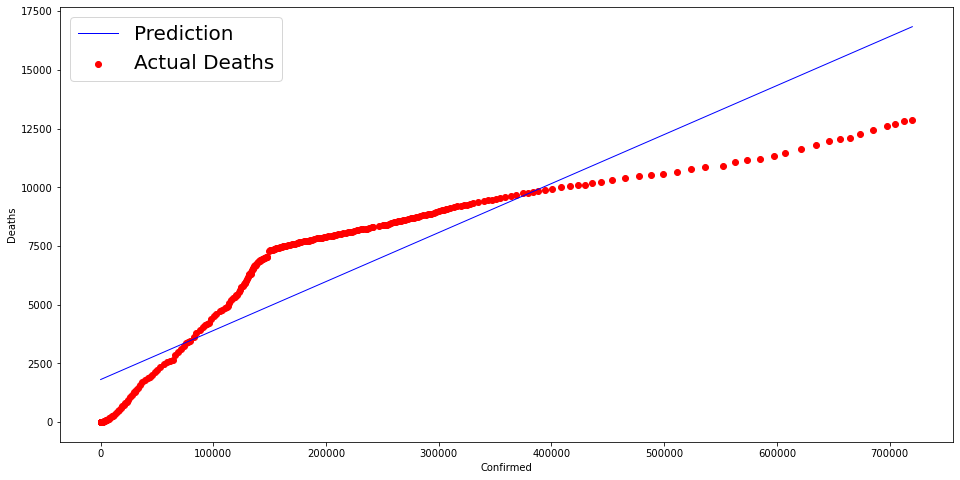

In [109]:
#linear regression

from sklearn.linear_model import LinearRegression

X = Ill['Confirmed'].values.reshape(-1,1)
y = Ill['Deaths'].values.reshape(-1,1)


reg = LinearRegression()
reg.fit(X, y)
p = reg.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter(
    X,
    y,
    c='red'
)
plt.plot(
    X,
    p,
    c='blue',
    linewidth=1
)

plt.legend(['Prediction', 'Actual Deaths'], prop={'size': 20})
plt.xlabel("Confirmed")
plt.ylabel("Deaths")
plt.show()


In [104]:
Ill = Ill.reset_index()
Ill['Days'] = Ill.index

# Ill['day'] = Ill['Date'].dt.day
Ill

,level_0,index,Province_State,Date,Confirmed,Deaths,New_cases,New_deaths,month,day,Days
0,0,5321,Illinois,2020-01-22,0,0,0,0,1,22,0
1,1,5322,Illinois,2020-01-23,0,0,0,0,1,23,1
2,2,5323,Illinois,2020-01-24,1,0,1,0,1,24,2
3,3,5324,Illinois,2020-01-25,1,0,0,0,1,25,3
4,4,5325,Illinois,2020-01-26,1,0,0,0,1,26,4
...,...,...,...,...,...,...,...,...,...,...,...
308,308,5629,Illinois,2020-11-25,685467,12439,11378,178,11,25,308
309,309,5630,Illinois,2020-11-26,697489,12594,12022,155,11,26,309
310,310,5631,Illinois,2020-11-27,705063,12685,7574,91,11,27,310
311,311,5632,Illinois,2020-11-28,712936,12838,7873,153,11,28,311


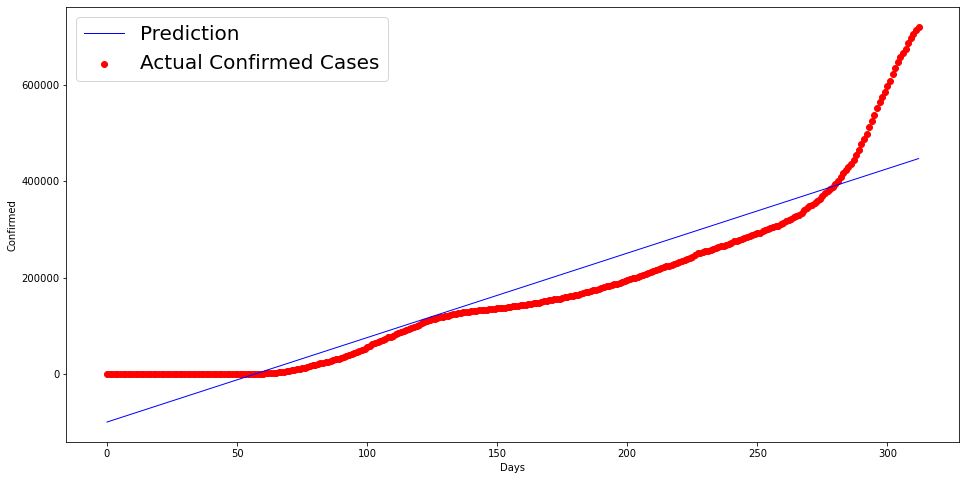

In [110]:
import matplotlib.pyplot as plt


X = Ill['Days'].values.reshape(-1,1)
y = Ill['Confirmed'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)
p = reg.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter(
    X,
    y,
    c='red'
)
plt.plot(
    X,
    p,
    c='blue',
    linewidth=1
)

# plt.xticks(np.arange(Ill.shape[0])[::20], Ill.Date[1::20], rotation=35)

plt.legend(['Prediction', 'Actual Confirmed Cases'], prop={'size': 20})
plt.xlabel("Days")
plt.ylabel("Confirmed")
plt.show()